# **TE_Log_Flight**

* The system will leverage computer vision for structural analysis and deep learning models for component health evaluation. 
* By processing sensor and battery data, the model will predict the next major component check, generate automated health reports, and assist in repair scheduling based on flight history. 
* The integration with a Ground Control System (GCS) will ensure real-time data acquisition for more accurate assessments.

Key functionalities include:
* Computer Vision Analysis for detecting structural damage.
* ML-Based Component Health Monitoring using sensor and flight data.
* Predictive Maintenance Algorithm to estimate component check intervals.
* Automated Report Generation for maintenance and health assessments.

# Data Analysis

In [1]:
import os
import pandas as pd
import kagglehub
import kagglehub

In [2]:
os.environ["KAGGLE_USERNAME"] = "raj066"
os.environ["KAGGLE_KEY"] = "302fcaa46a30e6ad9d8e76dc56d93677"  # Replace with regenerated key

# Data Collection

In [3]:
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "TE_bat_log.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "raj066/te-bat-log",
  file_path)

print("First 5 records:", df.head())

C:\Users\himan\AppData\Local\Temp\ipykernel_18376\3973327506.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    timestamp(ms)  BAT[0].Volt  BAT[0].Curr     POS.Alt  ATT.Roll  ATT.Pitch  \
0  210403.426144    24.405762    31.247171  222.899994      0.97      -2.08   
1  210503.426144    24.414291    31.141188  222.989990      1.02      -2.38   
2  210603.426144    24.409498    31.093618  223.069992      1.05      -2.41   
3  210703.426144    24.416687    30.743761  223.139999      0.92      -2.51   
4  210803.426144    24.411489    30.891661  223.199997      0.84      -2.62   

   ATT.Yaw  
0    29.79  
1    29.87  
2    29.80  
3    29.77  
4    29.82  


In [4]:
df

,timestamp(ms),BAT[0].Volt,BAT[0].Curr,POS.Alt,ATT.Roll,ATT.Pitch,ATT.Yaw
0,2.104034e+05,24.405762,31.247171,222.899994,0.97,-2.08,29.79
1,2.105034e+05,24.414291,31.141188,222.989990,1.02,-2.38,29.87
2,2.106034e+05,24.409498,31.093618,223.069992,1.05,-2.41,29.80
3,2.107034e+05,24.416687,30.743761,223.139999,0.92,-2.51,29.77
4,2.108034e+05,24.411489,30.891661,223.199997,0.84,-2.62,29.82
...,...,...,...,...,...,...,...
22997,2.510103e+06,21.100994,34.536491,222.549988,0.31,-0.93,9.20
22998,2.510203e+06,21.107512,34.407326,222.559998,0.38,-0.93,9.25
22999,2.510303e+06,21.109524,34.201988,222.569992,0.62,-0.69,9.23
23000,2.510403e+06,21.104731,33.916260,222.580002,0.66,-0.66,9.23


# Data Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp(ms),23002.0,1.360453e+06,664024.978195,2.104034e+05,785428.426144,1.360453e+06,1.935478e+06,2.510503e+06
BAT[0].Volt,23002.0,2.239411e+01,0.814560,2.108662e+01,21.752885,2.220168e+01,2.298440e+01,2.464634e+01
BAT[0].Curr,23002.0,3.251428e+01,1.551482,-7.950007e-09,31.635418,3.262206e+01,3.348052e+01,3.960641e+01
POS.Alt,23002.0,2.256500e+02,4.561539,-5.432739e-03,223.639999,2.252100e+02,2.269700e+02,2.463100e+02
ATT.Roll,23002.0,5.065825e-01,3.610199,-1.954000e+01,-0.420000,5.000000e-01,1.510000e+00,2.460000e+01
ATT.Pitch,23002.0,-2.015016e-01,2.472261,-1.747700e+02,-1.330000,-7.000000e-01,1.027500e+00,1.223000e+01
ATT.Yaw,23002.0,2.496761e+02,124.348056,4.000000e-02,182.460000,3.310400e+02,3.505200e+02,3.595200e+02


# Data Cleaning

Null Data

In [6]:
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill
df.fillna(df.mean(), inplace=True)       # Fill with column mean
df.dropna(inplace=True)

timestamp(ms)    0
BAT[0].Volt      0
BAT[0].Curr      0
POS.Alt          0
ATT.Roll         0
ATT.Pitch        0
ATT.Yaw          0
dtype: int64


C:\Users\himan\AppData\Local\Temp\ipykernel_18492\3440146525.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\himan\AppData\Local\Temp\ipykernel_18492\3440146525.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Duplicate data

In [7]:
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Remove duplicate rows
df = df.drop_duplicates()

# Confirm duplicates removed
print(f"After Removing Duplicates, Shape of Data: {df.shape}")


Number of Duplicate Rows: 0
After Removing Duplicates, Shape of Data: (23002, 7)


# Z-Score Method
Z-scores can help identify outliers

In [8]:
from scipy import stats

# Compute Z-scores
z_scores = stats.zscore(df["BAT[0].Volt"])
df = df[(z_scores < 3) & (z_scores > -3)]

print(z_scores)

0        2.469670
1        2.480142
2        2.474257
3        2.483083
4        2.476702
           ...   
22997   -1.587540
22998   -1.579539
22999   -1.577068
23000   -1.582953
23001   -1.573300
Name: BAT[0].Volt, Length: 23002, dtype: float64


# IQR Method
Removes extreme values for better model accuracy.

In [9]:
Q1 = df["BAT[0].Volt"].quantile(0.25)
Q3 = df["BAT[0].Volt"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["BAT[0].Volt"] > lower_bound) & (df["BAT[0].Volt"] < upper_bound)]

Data Time Format

In [10]:
df["timestamp(ms)"]=pd.to_datetime(df["timestamp(ms)"], unit="ms")
df.set_index("timestamp(ms)", inplace=True)
print(df)

                               BAT[0].Volt  BAT[0].Curr     POS.Alt  ATT.Roll  \
timestamp(ms)                                                                   
1970-01-01 00:03:30.403426144    24.405762    31.247171  222.899994      0.97   
1970-01-01 00:03:30.503426144    24.414291    31.141188  222.989990      1.02   
1970-01-01 00:03:30.603426144    24.409498    31.093618  223.069992      1.05   
1970-01-01 00:03:30.703426144    24.416687    30.743761  223.139999      0.92   
1970-01-01 00:03:30.803426144    24.411489    30.891661  223.199997      0.84   
...                                    ...          ...         ...       ...   
1970-01-01 00:41:50.103426144    21.100994    34.536491  222.549988      0.31   
1970-01-01 00:41:50.203426144    21.107512    34.407326  222.559998      0.38   
1970-01-01 00:41:50.303426144    21.109524    34.201988  222.569992      0.62   
1970-01-01 00:41:50.403426144    21.104731    33.916260  222.580002      0.66   
1970-01-01 00:41:50.50342614

# Feature Engineering
(Rolling Stats, Lag Features)

In [11]:
df["Volt_RollingMean"] = df["BAT[0].Volt"].rolling(window=10).mean()
df["Volt_RollingStd"] = df["BAT[0].Volt"].rolling(window=10).std()

# Lag Features (Time-Shifted Data)

In [12]:
df["Volt_Lag1"] = df["BAT[0].Volt"].shift(1)
df["Volt_Lag2"] = df["BAT[0].Volt"].shift(2)

# Normalization & Standardization

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize data
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nNormalized Data Sample:")
print(df.head())


Normalized Data Sample:
                               BAT[0].Volt  BAT[0].Curr   POS.Alt  ATT.Roll  \
timestamp(ms)                                                                 
1970-01-01 00:03:30.403426144     0.932416     0.788942  0.904959  0.464658   
1970-01-01 00:03:30.503426144     0.934812     0.786266  0.905325  0.465791   
1970-01-01 00:03:30.603426144     0.933466     0.785065  0.905649  0.466470   
1970-01-01 00:03:30.703426144     0.935485     0.776232  0.905934  0.463525   
1970-01-01 00:03:30.803426144     0.934025     0.779966  0.906177  0.461713   

                               ATT.Pitch   ATT.Yaw  Volt_RollingMean  \
timestamp(ms)                                                          
1970-01-01 00:03:30.403426144   0.923476  0.082758               NaN   
1970-01-01 00:03:30.503426144   0.921872  0.082981               NaN   
1970-01-01 00:03:30.603426144   0.921711  0.082786               NaN   
1970-01-01 00:03:30.703426144   0.921176  0.082703           

# Data Resampling

In [15]:
df_resampled = df.resample("1S").mean()  # Resample to 1-second intervals

C:\Users\himan\AppData\Local\Temp\ipykernel_18492\1938522653.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample("1S").mean()  # Resample to 1-second intervals


# Data Augmentation

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df["BAT[0].Volt_Aug"] = df["BAT[0].Volt"] + np.random.normal(0, 0.1, df.shape[0])

array([[<Axes: title={'center': 'BAT[0].Volt'}>,
        <Axes: title={'center': 'BAT[0].Curr'}>,
        <Axes: title={'center': 'POS.Alt'}>],
       [<Axes: title={'center': 'ATT.Roll'}>,
        <Axes: title={'center': 'ATT.Pitch'}>,
        <Axes: title={'center': 'ATT.Yaw'}>],
       [<Axes: title={'center': 'Volt_RollingMean'}>,
        <Axes: title={'center': 'Volt_RollingStd'}>,
        <Axes: title={'center': 'Volt_Lag1'}>],
       [<Axes: title={'center': 'Volt_Lag2'}>,
        <Axes: title={'center': 'BAT[0].Volt_Aug'}>, <Axes: >]],
      dtype=object)

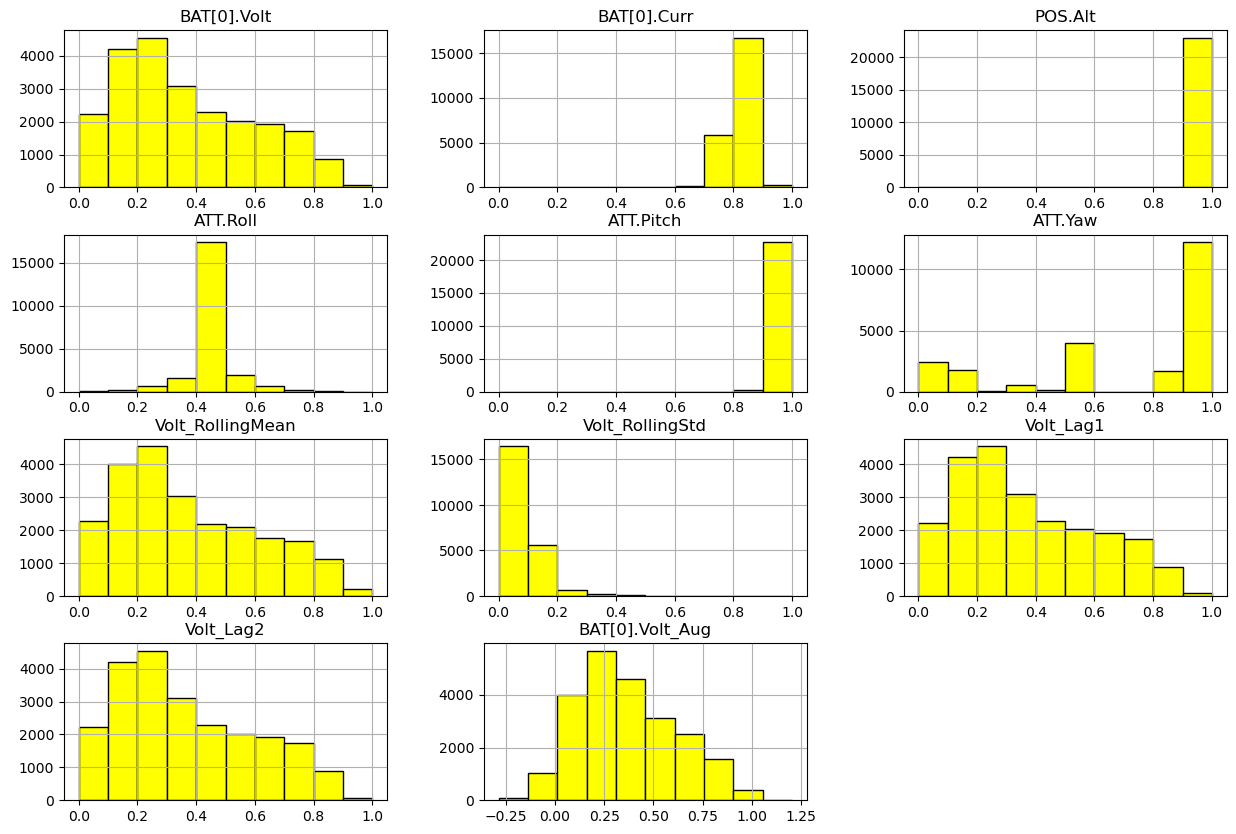

In [18]:
df.hist(figsize=(15,10),bins=10,color="yellow",edgecolor='black')

This graph shows histograms for different columns in your dataset, providing a visual representation of the distribution of values for each variable. Here's a quick analysis of each plot:

1. **`timestamp(ms)`**:  
   - The data appears uniformly distributed, likely representing a time series with evenly spaced timestamps.

2. **`BAT[0].Volt`**:  
   - The battery voltage is slightly skewed to the right, with most values concentrated between 21 and 23 volts. There might be a few higher values, but no extreme outliers are evident.

3. **`BAT[0].Curr`**:  
   - The battery current is heavily skewed to the right, with most values clustered around 30–40. There might be potential outliers on the lower end.

4. **`POS.Alt`**:  
   - The altitude (`POS.Alt`) is concentrated near 250, with very few values below that. This could indicate a consistent altitude or a potential issue with data variability.

5. **`ATT.Roll`**:  
   - The roll angle is normally distributed around 0, with most values between -10 and 10. This suggests stable roll behavior.

6. **`ATT.Pitch`**:  
   - The pitch angle is heavily skewed to the left, with most values near 0. The extreme negative values could be outliers or represent specific events.

7. **`ATT.Yaw`**:  
   - The yaw angle has a multimodal distribution, with peaks around 0, 200, and 300. This could indicate distinct states or orientations in the data.

### Key Observations:
- Some variables (e.g., `BAT[0].Curr`, `ATT.Pitch`) show skewness, which might require transformation for analysis.
- Potential outliers are visible in `POS.Alt`, `ATT.Pitch`, and `ATT.Yaw`.
- The distributions suggest different behaviors for each variable, which could be important for further analysis.

Would you like to explore specific variables or handle potential outliers?

# voltage variation over time.

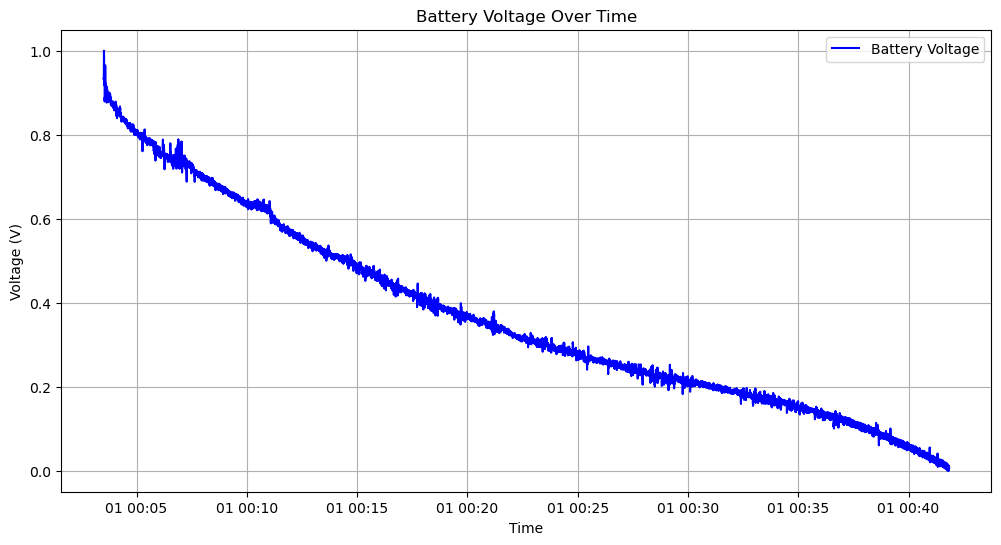

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["BAT[0].Volt"], label="Battery Voltage", color="blue")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.title("Battery Voltage Over Time")
plt.legend()
plt.grid()
plt.show()

# Current variation over time.

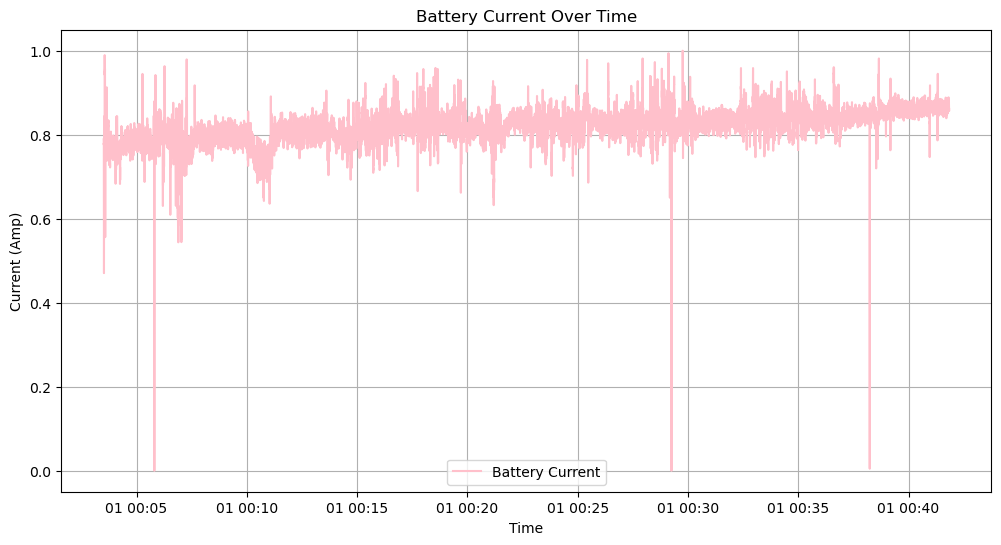

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["BAT[0].Curr"], label="Battery Current", color="Pink")
plt.xlabel("Time")
plt.ylabel("Current (Amp)")
plt.title("Battery Current Over Time")
plt.legend()
plt.grid()
plt.show()

# (Battery Current vs Voltage)

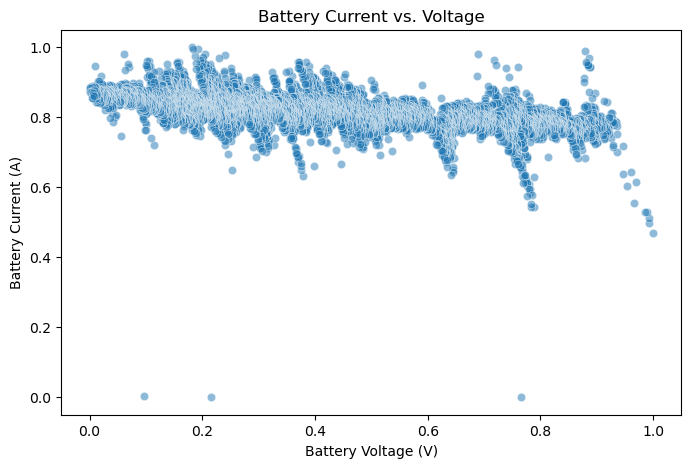

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["BAT[0].Volt"], y=df["BAT[0].Curr"], alpha=0.5)
plt.xlabel("Battery Voltage (V)")
plt.ylabel("Battery Current (A)")
plt.title("Battery Current vs. Voltage")
plt.show()

This scatter plot visualizes the relationship between **Battery Voltage (V)** and **Battery Current (A)**. Here's what the data suggests:

1. **General Trend**:
   - There seems to be a dense cluster of points where the current is relatively stable (around 0.8–1.0 A) across a range of voltages.
   - This indicates that the battery operates within a consistent current range for most voltage levels.

2. **Outliers**:
   - There are a few points where the current drops significantly (close to 0 A), even at higher voltage levels. These could be outliers or represent specific events, such as a sudden drop in load or measurement errors.
   - Similarly, there are some points at very low voltage (close to 0 V), which might indicate faulty readings or edge cases.

3. **Voltage Range**:
   - The voltage values appear normalized (ranging from 0 to 1), which might indicate preprocessing. If this is the case, the original scale should be considered for better interpretation.

4. **Noise**:
   - The data shows some variability (scatter) in current values at certain voltage levels, which could be due to noise or fluctuations in the system.

### Key Observations:
- The relationship between voltage and current appears mostly stable, but the outliers (low current or voltage) should be investigated further.
- If these outliers are not expected, they might need to be removed or handled during preprocessing.

Would you like to analyze these outliers further or explore the underlying cause?

# Rolling Mean & Standard Deviation Plot
To smooth fluctuations and detect anomalies

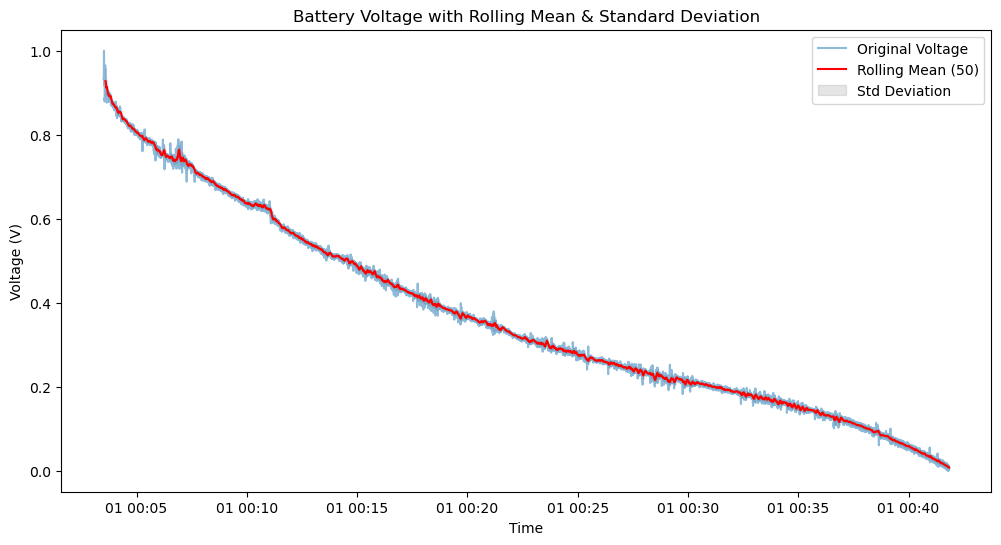

In [22]:
df["Rolling Mean"] = df["BAT[0].Volt"].rolling(window=50).mean()
df["Rolling Std"] = df["BAT[0].Volt"].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["BAT[0].Volt"], alpha=0.5, label="Original Voltage")
plt.plot(df.index, df["Rolling Mean"], color="red", label="Rolling Mean (50)")
plt.fill_between(df.index, df["Rolling Mean"] - df["Rolling Std"], df["Rolling Mean"] + df["Rolling Std"], color="gray", alpha=0.2, label="Std Deviation")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.title("Battery Voltage with Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

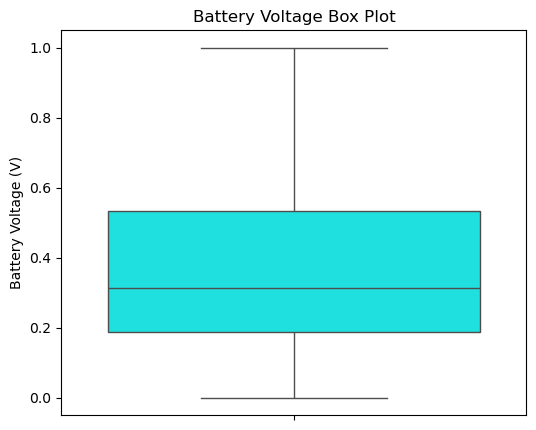

In [23]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["BAT[0].Volt"], color="cyan")
plt.ylabel("Battery Voltage (V)")
plt.title("Battery Voltage Box Plot")
plt.show()

# Heatmap (Correlation Between Variables)
To find relationships between battery parameters.


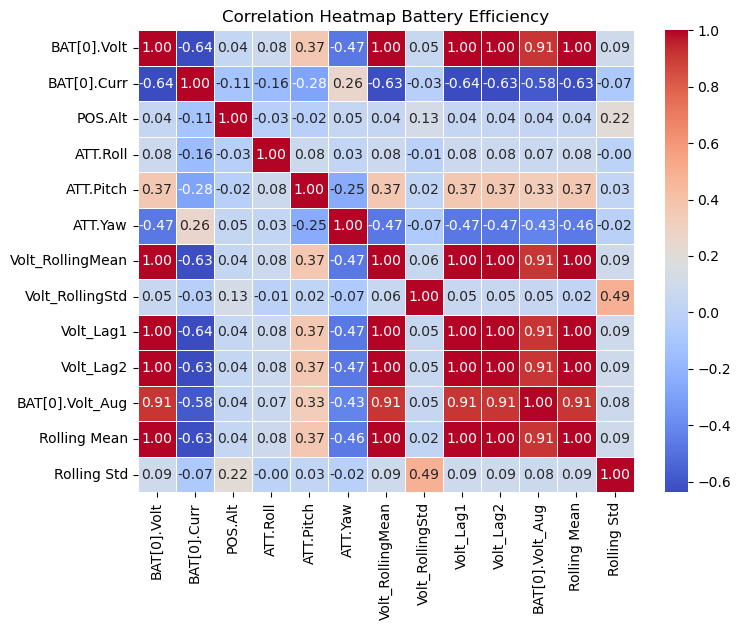

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Battery Efficiency")
plt.show()

# Anomaly Detection using Voltage Thresholds

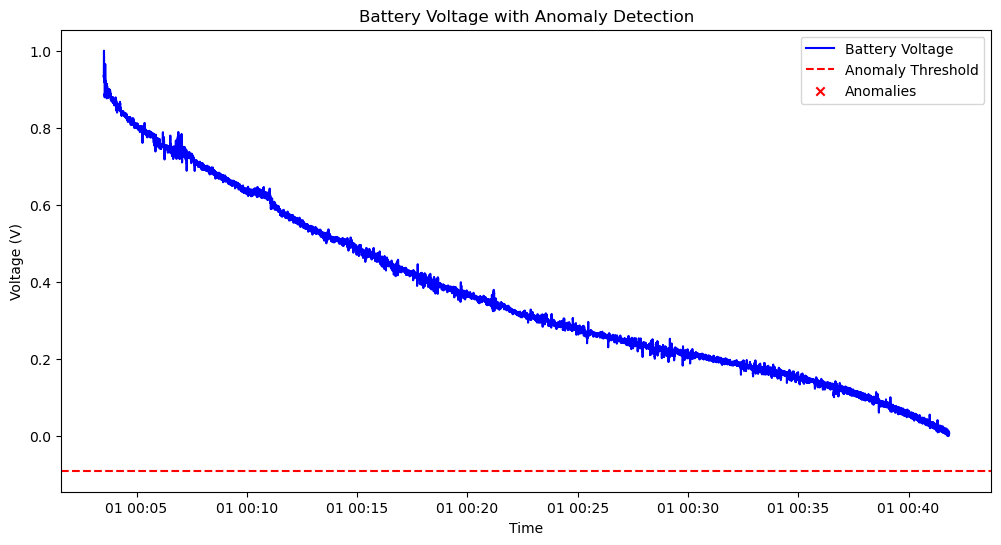

In [25]:
threshold = df["BAT[0].Volt"].mean() - (2 * df["BAT[0].Volt"].std())  # Define anomaly threshold

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["BAT[0].Volt"], label="Battery Voltage", color="blue")
plt.axhline(y=threshold, color="red", linestyle="--", label="Anomaly Threshold")
plt.scatter(df[df["BAT[0].Volt"] < threshold].index, df[df["BAT[0].Volt"] < threshold]["BAT[0].Volt"], color="red", label="Anomalies", marker="x")
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.title("Battery Voltage with Anomaly Detection")
plt.legend()
plt.show()

# Flight Stability Visualization (Roll, Pitch, Yaw)

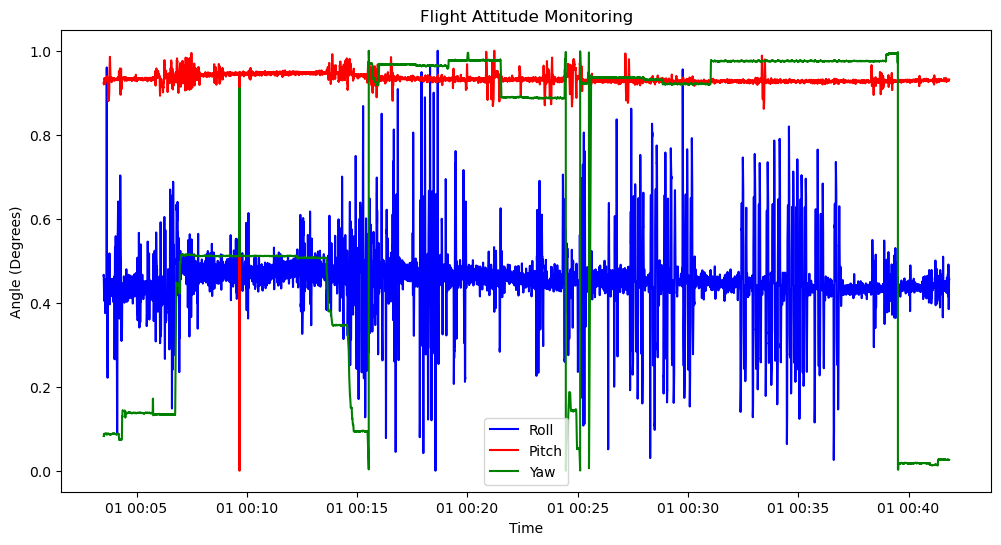

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["ATT.Roll"], label="Roll", color="blue")
plt.plot(df.index, df["ATT.Pitch"], label="Pitch", color="red")
plt.plot(df.index, df["ATT.Yaw"], label="Yaw", color="green")
plt.xlabel("Time")
plt.ylabel("Angle (Degrees)")
plt.title("Flight Attitude Monitoring")
plt.legend()
plt.show()

# Time-Series Decomposition

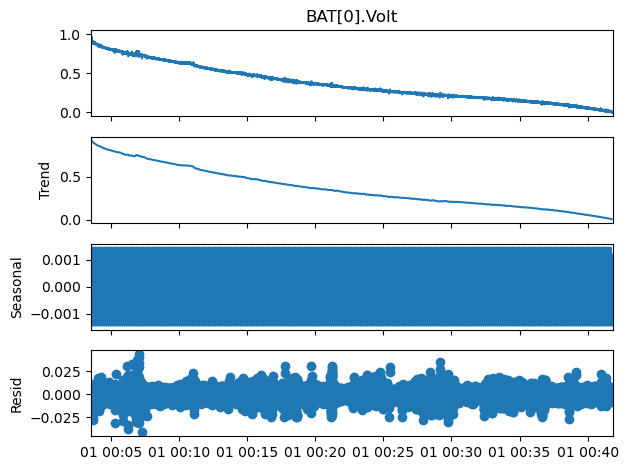

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["BAT[0].Volt"], model="additive", period=100)
result.plot()
plt.show()

In [28]:
print(df.columns)

Index(['BAT[0].Volt', 'BAT[0].Curr', 'POS.Alt', 'ATT.Roll', 'ATT.Pitch',
       'ATT.Yaw', 'Volt_RollingMean', 'Volt_RollingStd', 'Volt_Lag1',
       'Volt_Lag2', 'BAT[0].Volt_Aug', 'Rolling Mean', 'Rolling Std'],
      dtype='object')


In [29]:
df.rename(columns={
    'timestamp(ms)': 'timestamp',
    'BAT[0].Volt': 'voltage',
    'BAT[0].Curr': 'current',
    'POS.Alt': 'altitude',
    'ATT.Roll': 'roll',
    'ATT.Pitch': 'pitch',
    'ATT.Yaw': 'yaw'
}, inplace=True)

print(df.head())  # Verify new column names


                                voltage   current  altitude      roll  \
timestamp(ms)                                                           
1970-01-01 00:03:30.403426144  0.932416  0.788942  0.904959  0.464658   
1970-01-01 00:03:30.503426144  0.934812  0.786266  0.905325  0.465791   
1970-01-01 00:03:30.603426144  0.933466  0.785065  0.905649  0.466470   
1970-01-01 00:03:30.703426144  0.935485  0.776232  0.905934  0.463525   
1970-01-01 00:03:30.803426144  0.934025  0.779966  0.906177  0.461713   

                                  pitch       yaw  Volt_RollingMean  \
timestamp(ms)                                                         
1970-01-01 00:03:30.403426144  0.923476  0.082758               NaN   
1970-01-01 00:03:30.503426144  0.921872  0.082981               NaN   
1970-01-01 00:03:30.603426144  0.921711  0.082786               NaN   
1970-01-01 00:03:30.703426144  0.921176  0.082703               NaN   
1970-01-01 00:03:30.803426144  0.920588  0.082842             

# Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["voltage"])
y = df["current"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X

,current,altitude,roll,pitch,yaw,Volt_RollingMean,Volt_RollingStd,Volt_Lag1,Volt_Lag2,BAT[0].Volt_Aug,Rolling Mean,Rolling Std
timestamp(ms),,,,,,,,,,,,
1970-01-01 00:03:30.403426144,0.788942,0.904959,0.464658,0.923476,0.082758,NaN,NaN,NaN,NaN,0.740625,NaN,NaN
1970-01-01 00:03:30.503426144,0.786266,0.905325,0.465791,0.921872,0.082981,NaN,NaN,0.932416,NaN,0.998644,NaN,NaN
1970-01-01 00:03:30.603426144,0.785065,0.905649,0.466470,0.921711,0.082786,NaN,NaN,0.934812,0.932416,0.997580,NaN,NaN
1970-01-01 00:03:30.703426144,0.776232,0.905934,0.463525,0.921176,0.082703,NaN,NaN,0.933466,0.934812,1.149381,NaN,NaN
1970-01-01 00:03:30.803426144,0.779966,0.906177,0.461713,0.920588,0.082842,NaN,NaN,0.935485,0.933466,1.064032,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:41:50.103426144,0.871993,0.903538,0.449705,0.929626,0.025481,0.001232,0.089462,0.007446,0.011901,0.008881,0.007560,0.004066
1970-01-01 00:41:50.203426144,0.868731,0.903579,0.451291,0.929626,0.025620,0.001412,0.086977,0.004039,0.007446,-0.005015,0.007552,0.004069
1970-01-01 00:41:50.303426144,0.863547,0.903619,0.456729,0.930909,0.025565,0.002079,0.060771,0.005870,0.004039,0.052095,0.007568,0.004063


In [34]:
y

timestamp(ms)
1970-01-01 00:03:30.403426144    0.788942
1970-01-01 00:03:30.503426144    0.786266
1970-01-01 00:03:30.603426144    0.785065
1970-01-01 00:03:30.703426144    0.776232
1970-01-01 00:03:30.803426144    0.779966
                                   ...   
1970-01-01 00:41:50.103426144    0.871993
1970-01-01 00:41:50.203426144    0.868731
1970-01-01 00:41:50.303426144    0.863547
1970-01-01 00:41:50.403426144    0.856333
1970-01-01 00:41:50.503426144    0.861319
Name: current, Length: 23002, dtype: float64